In [1]:
import drawsvg as dw
%load_ext jhmagics

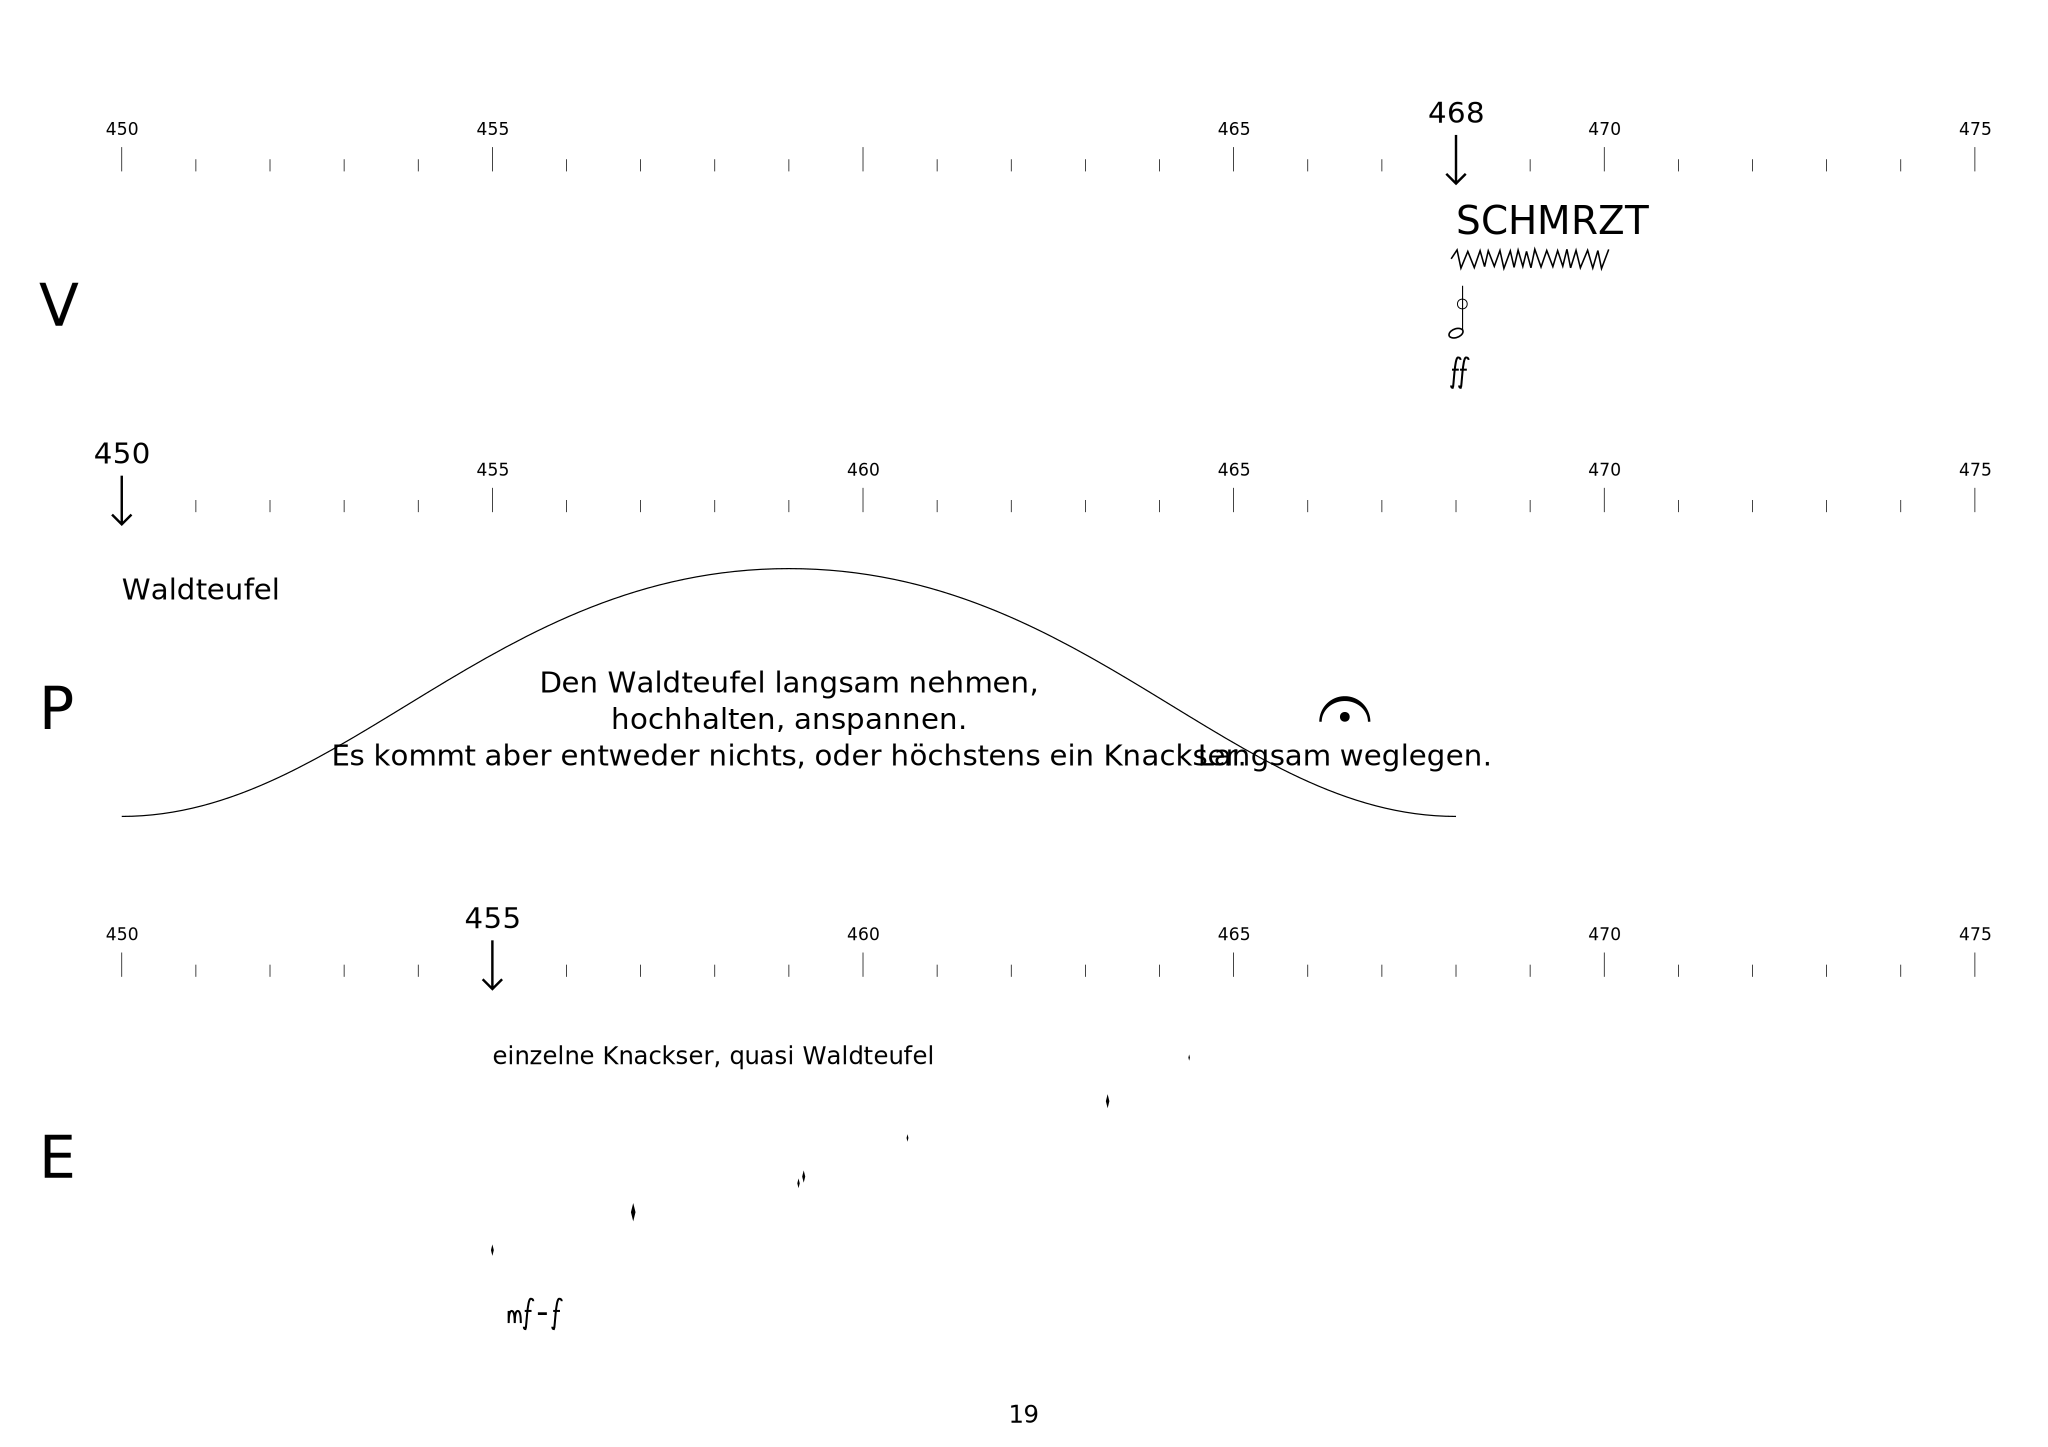

In [42]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# seitenzahl
seite = 19
d.append(dw.Text('%d'%seite,10,w/2,h-10,text_anchor='middle'))

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 450  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[450,455,465,470,475],[455,460,465,470,475],[450,460,465,470,475]]
 # events in V P E
event = [[468],[450],[455]]
 # ygrid positionen für die leisten
yleisten = [1,6.5,14]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.3)
        else: vline(x,y+off,-5,sw=.3)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,7,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # schmrzt
x = xg(468)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text baseline
text('SCHMRZT',x-2,yg(ygindxtext),16)
y = yg(ygindxvtop+2.4)
krackelinie(x-2,yg(ygindxtext+.4),xg(470),yg(ygindxtext+.4),swfac=.8)
not2tel(x,y,nothals*1.4,notsiz)
circ(x+2.6,y-12,r=2,swfac=2,fill='none')
yy = y+20
fortissimo(x,yy,dynsiz)


################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
yloffsets = [6,4] #abstände der linien von der perc zeitleiste
yltemp,ylalu = [i+ypercindx for i in yloffsets]
ypercinstrs = [yltemp,ylalu]
startends = [444,445,446,449]
insnamen = [['Tempel-','block'],'Alufolie']
yoffsetins = [2.9,2.4] #abstand der namen von den linien
for i,yl in enumerate(ypercinstrs):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    #line(x1,y,x2,y,stroke_width=0.5)
    #text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')    

 # waldteufel
x = xg(450)
y = yg(12)
y1 = yg(8)
text('Waldteufel',x,yg(8.5),12,font_family='Cantarell')   
path_segc([x,y, xg(453),y,xg(455),y1,xg(459),y1, xg(463),y1,xg(465),y,xg(468),y],sw=.5)
ytext = yg(10)
text('Den Waldteufel langsam nehmen,',xg(459),ytext,12,font_family='Cantarell Light',text_anchor='middle')
ytext += 15
text('hochhalten, anspannen.',xg(459),ytext,12,font_family='Cantarell Light',text_anchor='middle')
ytext += 15
text('Es kommt aber entweder nichts, oder höchstens ein Knackser.',xg(459),ytext,12,font_family='Cantarell Light',text_anchor='middle')
text('Langsam weglegen.',xg(466.5),ytext,12,font_family='Cantarell Light',text_anchor='middle')
fermate(xg(466.5),ytext-20)

################# ELEKTRONIK #################

# knackser
x = xg(455)
y = yg(19)
text('einzelne Knackser, quasi Waldteufel',x,yg(16),10,font_family='Cantarell Light')
xlis = [xg(410+i) for i in (45.0, 46.9, 49.2, 50.6, 53.3, 54.4)]
y1 = y
from random import uniform,seed
seed(11)
for i in xlis:
    w = uniform(.5,2)
    raute(i,y1,w,w*4)
    y1 -= uniform(10,20)
raute(xg(459.13),yg(18)-2,1,4)
x += 10
yy = y+30
mezzoforte(x,yy,dynsiz)
text('-',x+8,yy)
forte(x+15,yy,dynsiz)

d.set_pixel_scale(4)
d.save_png('partitur_%02d.png'%seite)
d.save_svg('partitur_%02d.svg'%seite)
d

In [21]:
help(dot)

Help on function dot in module __main__:

dot(x=10, y=10, r=3, c='black', **args)
    quasi d.append(dw.Circle(...))
    with radius=3 and color=black as default

